### Analysis about the current US fuel cycle
Includes each of the current reactors and their decommissioning, based on license expirations. This notebook looks specifically at the amount of fuel and enriched U that is required by the current fuel cycle.

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
import cymetric as cym
from cymetric import timeseries
from cymetric import filters
from cymetric import tools

import transition_metrics as tm

In [3]:
current_outfile = '../outputs/united_states_2020.sqlite'
mmr_outfile = '../outputs/united_states_mmr.sqlite'
xe_outfile = '../outputs/united_states_xe100.sqlite'

## Reactors Built and Decommissioned

This section plots the number of each reactor type in the simulation as a function of time

In [29]:
current_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill',
                 'Enrichment', 'FuelFab', 'DryStorage', 'United States',
                 'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA']
mmr_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill',
             'Enrichment', 'FuelFab', 'DryStorage', 'United States',
             'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
             'MMR_enter','MMR_exit', 'Enrichment2', 'FuelFab2']
xe_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill',
             'LEUEnrichment', 'FuelFab', 'DryStorage', 'United States',
             'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
             'Xe-100_enter','Xe-100_exit', 'FuelFab2', 'Enrichment']

In [30]:
current_reactors = tm.rx_commission_decommission(current_outfile, current_nonlwr)
current_reactors = tm.add_year(current_reactors)

mmr_reactors = tm.rx_commission_decommission(mmr_outfile, mmr_nonlwr)
mmr_reactors = tm.add_year(mmr_reactors)
mmr_reactors['mmr_total'] = (mmr_reactors['MMR_enter'] - mmr_reactors['MMR_exit']).cumsum()

xe_reactors = tm.rx_commission_decommission(xe_outfile, xe_nonlwr)
xe_reactors = tm.add_year(xe_reactors)
xe_reactors['xe_total'] = (xe_reactors['Xe-100_enter'] - xe_reactors['Xe-100_exit']).cumsum()

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


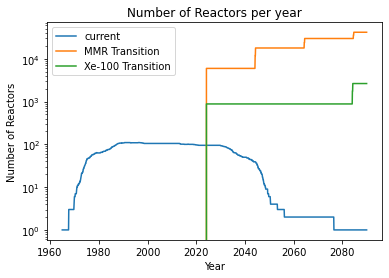

In [38]:
plt.figure()
plt.plot(current_reactors['Year'], current_reactors['lwr_total'], label='current')
plt.plot(mmr_reactors['Year'], mmr_reactors['mmr_total'], label='MMR Transition')
plt.plot(xe_reactors['Year'], xe_reactors['xe_total'], label='Xe-100 Transition')
plt.title('Number of Reactors per year')
plt.xlabel('Year')
plt.ylabel('Number of Reactors')
plt.yscale('log')
plt.legend()
#plt.savefig('figures/rx_deployment_all.png')

In [34]:
evaler = tm.get_metrics(mmr_outfile)
evaler.eval('AnnualElectricityGeneratedByAgent')

,SimId,AgentId,Year,Energy
0,2af7a6fa-919c-42d9-a651-65973f51cbb7,170,2,0.000000
1,2af7a6fa-919c-42d9-a651-65973f51cbb7,170,3,0.000000
2,2af7a6fa-919c-42d9-a651-65973f51cbb7,170,4,0.000000
3,2af7a6fa-919c-42d9-a651-65973f51cbb7,170,5,0.000000
4,2af7a6fa-919c-42d9-a651-65973f51cbb7,170,6,0.000000
...,...,...,...,...
417765,2af7a6fa-919c-42d9-a651-65973f51cbb7,24133,120,0.000000
417766,2af7a6fa-919c-42d9-a651-65973f51cbb7,24133,121,0.000000
417767,2af7a6fa-919c-42d9-a651-65973f51cbb7,24133,122,5.833333
417768,2af7a6fa-919c-42d9-a651-65973f51cbb7,24133,123,10.000000


## Eletricity output

In [35]:
current_energy = tm.get_electricity(current_outfile)
mmr_energy = tm.get_electricity(mmr_outfile)
xe_energy = tm.get_electricity(xe_outfile)

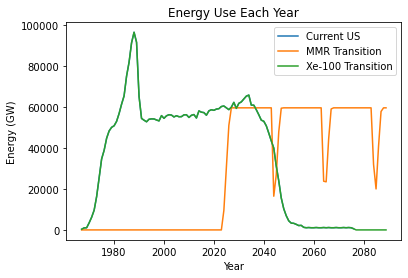

In [36]:
plt.figure()
plt.plot(current_energy['Year'], current_energy['Energy (GW)'], label='Current US')
plt.plot(mmr_energy['Year'], mmr_energy['Energy (GW)'], label='MMR Transition')
plt.plot(xe_energy['Year'], xe_energy['Energy (GW)'], label='Xe-100 Transition')
plt.title('Energy Use Each Year')
plt.xlabel('Year')
plt.ylabel('Energy (GW)')
plt.legend()
#plt.savefig('figures/energy_all.png')

In [ ]:
#Provides level of electricity to set for transitions
current_energy['Energy (GW)'].loc[current_energy['Year'] == 2025]
current_energy['Year'].loc[current_energy['Energy (GW)'] == max(current_energy['Energy (GW)'][35:70])]
current_energy[65:70]

# Calculating annual throughputs

## Calculating annual enriched U supplied by enrichment facility (product)

In [ ]:
current_leu = tm.calculate_throughput(current_outfile, 'enr_u')
mmr_leu = tm.calculate_throughput(mmr_outfile, 'enr_u')
mmr_haleu = tm.calculate_throughput(mmr_outfile, 'haleu')
xe_leu = tm.calculate_throughput(xe_outfile, 'enr_u')
xe_haleu = tm.calculate_throughput(xe_outfile, 'haleu')

## Calculating annual feed material

In [ ]:
current_feed = tm.calculate_throughput(current_outfile, 'uf6')
mmr_feed = tm.calculate_throughput(mmr_outfile, 'uf6')
xe_feed = tm.calculate_throughput(xe_outfile, 'uf6')

## Calculating annual tails production

In [ ]:
current_tails = tm.calculate_throughput(current_outfile, 'tails')
mmr_tails = tm.calculate_throughput(mmr_outfile, 'tails')
xe_tails = tm.calculate_throughput(xe_outfile, 'tails')

## Calculating annual fuel production

In [ ]:
current_uox = tm.calculate_throughput(current_outfile, 'fresh_uox')
mmr_uox = tm.calculate_throughput(mmr_outfile, 'fresh_uox')
mmr_triso = tm.calculate_throughput(mmr_outfile, 'TRISO')
xe_uox = tm.calculate_throughput(xe_outfile, 'fresh_uox')
xe_triso = tm.calculate_throughput(xe_outfile, 'TRISO')

## Plotting material transactions

In [ ]:
# current fuel cycle
current_commodities = tm.merge_databases([current_leu, current_feed, current_tails, current_uox])
tm.plot_metric(current_commodities, ['Year', 'enr_u', 'uf6', 'tails', 'fresh_uox'], 
            ['Year', 'Mass (kg)', 'Commodity', r'4.5% $^{235}$U', r'UF$_6$','tails', r'UO$_2$'])
plt.title('Current US Transactions')
plt.savefig('figures/commodity_demand_2020.png')

In [ ]:
# MMR transition
mmr_commodities = tm.merge_databases([mmr_leu, mmr_haleu, mmr_feed, mmr_tails,
                                      mmr_uox, mmr_triso])
tm.plot_metric(mmr_commodities, ['Year', 'enr_u', 'haleu', 'uf6', 'tails', 'TRISO', 'fresh_uox'], 
            ['Year', 'Mass (kg)', 'Commodity', r'4.5% $^{235}$U', r'13% $^{235}$U', 
             r'UF$_6$','tails', 'TRISO fuel', r'UO$_2$'])
plt.title('MMR Transition Transactions')
plt.yscale('log')
plt.savefig('figures/commodity_demand_mmr.png')

In [ ]:
#Xe-100 Transition
xe_commodities = tm.merge_databases([xe_leu, xe_haleu, xe_feed, xe_tails,
                                      xe_uox, xe_triso])
tm.plot_metric(xe_commodities, ['Year', 'enr_u', 'haleu', 'uf6', 'tails', 'TRISO', 'fresh_uox'], 
            ['Year', 'Mass (kg)', 'Commodity', r'4.5% $^{235}$U', r'13% $^{235}$U', 
             r'UF$_6$','tails', 'TRISO fuel', r'UO$_2$'])
plt.title('Xe-100 Transition Transactions')
plt.yscale('log')
plt.savefig('figures/commodity_demand_xe.png')

In [ ]:
#Comparing enriched uranum transactions
plt.figure()
plt.plot(current_commodities['Year'], current_commodities['enr_u'], label=r'Current LEU')
plt.plot(mmr_commodities['Year'], mmr_commodities['enr_u'], label='MMR LEU')
plt.plot(mmr_commodities['Year'], mmr_commodities['haleu'], label='MMR HALEU')
plt.plot(xe_commodities['Year'], xe_commodities['enr_u'], label='Xe-100 LEU')
plt.plot(xe_commodities['Year'], xe_commodities['haleu'], label='Xe-100 HALEU')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Mass (kg)')
plt.title('Mass of Enriched Uranium')
plt.savefig('figures/enrichedU_all.png')

## Determining feed, tails, and product assay

In [ ]:
#Defining assays
x_p = 0.045
x_f = 0.00711
x_t = 0.002

## SWU Calculation
SWU = (P*V(x_p) + T*V(x_t) - F*V(x_f))*t

V(x_i) = (2*x_i-1)*ln(x_i/(1-x_i))

In [ ]:
current_feed = tm.calculate_feed(current_commodities['enr_u'], current_commodities['tails'])
current_swu = tm.calculate_SWU(current_commodities['enr_u'], x_p, 
                               current_commodities['tails'], x_t, 
                               current_feed, x_f)
current_swu = current_swu.to_frame().reset_index()
current_swu = current_swu.rename(columns={0:'SWU', 'index':'Time'})
current_swu = tm.add_year(current_swu)
tm.plot_metric(current_swu, ['Year', 'SWU'], ['Year', 'SWU Capacity Needed', 'Scenario', 'Current US'])

In [ ]:
#tails and feed numbers are for both types of fuel and storage of feed at facility
leu_tails = tm.calculate_tails(mmr_commodities['enr_u'], x_p, x_t, x_f)
leu_feed = tm.calculate_feed(mmr_commodities['enr_u'], leu_tails)
haleu_tails = tm.calculate_tails(mmr_commodities['haleu'], 0.13, x_t, x_f)
haleu_feed = tm.calculate_feed(mmr_commodities['haleu'], haleu_tails)

mmr_leu_swu = tm.calculate_SWU(mmr_commodities['enr_u'], x_p, 
                               leu_tails, x_t, 
                               leu_feed, x_f)
mmr_leu_swu = mmr_leu_swu.to_frame().reset_index()
mmr_leu_swu = mmr_leu_swu.rename(columns={'enr_u':'SWU', 'index':'Time'})
mmr_leu_swu = tm.add_year(mmr_leu_swu)

mmr_haleu_swu = tm.calculate_SWU(mmr_commodities['haleu'], 0.13, 
                               haleu_tails, x_t, 
                               haleu_feed, x_f)
mmr_haleu_swu = mmr_haleu_swu.to_frame().reset_index()
mmr_haleu_swu = mmr_haleu_swu.rename(columns={'haleu':'SWU', 'index':'Time'})
mmr_haleu_swu = tm.add_year(mmr_haleu_swu)


plt.figure()
plt.plot(mmr_leu_swu['Year'], mmr_leu_swu['SWU'], label='LEU')
plt.plot(mmr_haleu_swu['Year'], mmr_haleu_swu['SWU'], label='HALEU')
plt.xlabel('Year')
plt.ylabel('SWU')
plt.title('SWU Requirements for each fuel type in MMR Transition')
plt.legend()
plt.savefig('figures/swu_mmr.png')

In [ ]:
#tails and feed numbers are for both types of fuel and storage of feed at facility
leu_tails = tm.calculate_tails(xe_commodities['enr_u'], x_p, x_t, x_f)
leu_feed = tm.calculate_feed(xe_commodities['enr_u'], leu_tails)
haleu_tails = tm.calculate_tails(xe_commodities['haleu'], 0.155, x_t, x_f)
haleu_feed = tm.calculate_feed(xe_commodities['haleu'], haleu_tails)

xe_leu_swu = tm.calculate_SWU(xe_commodities['enr_u'], x_p, 
                               leu_tails, x_t, 
                               leu_feed, x_f)
xe_leu_swu = xe_leu_swu.to_frame().reset_index()
xe_leu_swu = xe_leu_swu.rename(columns={'enr_u':'SWU', 'index':'Time'})
xe_leu_swu = tm.add_year(xe_leu_swu)

xe_haleu_swu = tm.calculate_SWU(xe_commodities['haleu'], 0.155, 
                               haleu_tails, x_t, 
                               haleu_feed, x_f)
xe_haleu_swu = xe_haleu_swu.to_frame().reset_index()
xe_haleu_swu = xe_haleu_swu.rename(columns={'haleu':'SWU', 'index':'Time'})
xe_haleu_swu = tm.add_year(xe_haleu_swu)


plt.figure()
plt.plot(xe_leu_swu['Year'], xe_leu_swu['SWU'], label='LEU')
plt.plot(xe_haleu_swu['Year'], xe_haleu_swu['SWU'], label='HALEU')
plt.xlabel('Year')
plt.ylabel('SWU')
plt.title('SWU Requirements for each fuel type for Xe-100 Transition')
plt.legend()
plt.savefig('figures/swu_xe.png')